# Lead Scoring Using Logistic Regression

In [117]:
#Import all the required libraries

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [118]:
# Importing Pandas and NumPy and visualisation libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Scaling
from sklearn.preprocessing import StandardScaler

#Model building
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Analysis of the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [119]:
#setting up display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Import and Inspect the dataset

In [120]:
# Importing the dataset
data = pd.read_csv(r"C:\Users\Dell\Desktop\Lead Scoring Case Study\temp/Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [121]:
data.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [122]:
data.shape

(9240, 37)

In [123]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [124]:
data.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [125]:
cat_cols=data.select_dtypes(exclude=np.number).columns.tolist()
cat_cols.remove('Prospect ID')
len(cat_cols)

29

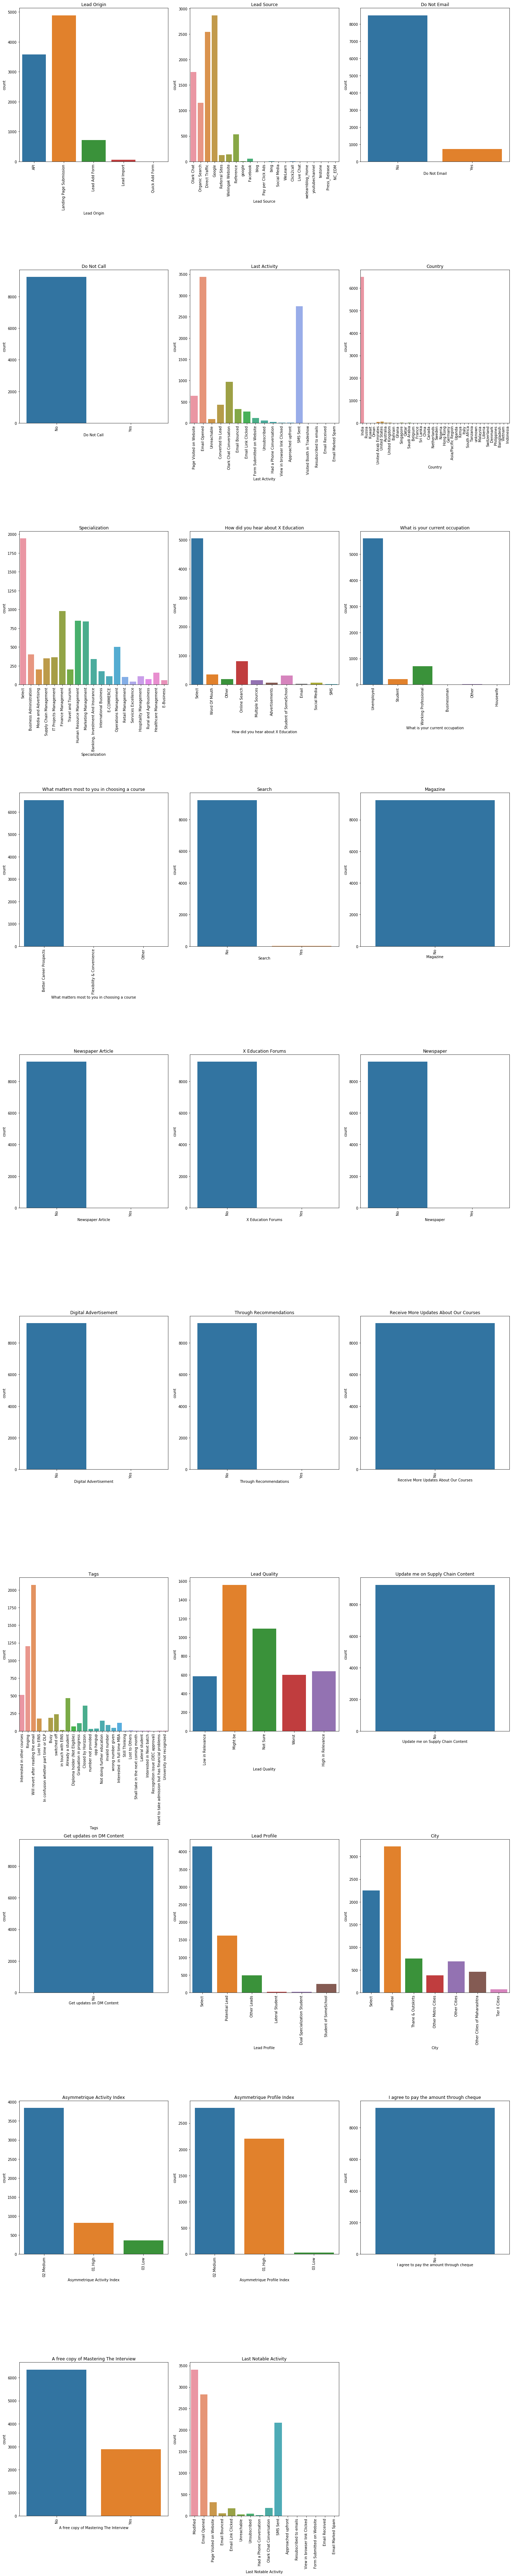

In [126]:
#Boxplot for analysing various values in categorical columns
plt.figure(figsize=(20,100))
c=1

for i in cat_cols:
    plt.subplot(10,3,c)
    plt.title(i)
    plt.xticks(rotation=90)
    sns.countplot(data[i])
    c+=1
plt.tight_layout()

## Preparation of the data

 Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value since it doesn't in effect impart any information . So lets replace 'Select' with null value.

In [127]:
data=data.replace('Select', np.nan)
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [128]:
len(data['Lead Number'].unique())

9240

In [129]:
# lets drop prospect id since 'Lead Number' column already uniquely identifies each lead 
# since it has a lot of values which are unique values which may cause issues while creating dummy variables

data.drop('Prospect ID',axis=1,inplace=True)

In [233]:
df=data.copy()
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,0,0,0,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0,0,0,0,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0,0,0,0,0,0,Modified


### Missing value Treatment

All the missing values in the dataset needs to be rectified and the types and data in the columns should match. Also the outliers need to be identified.

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 non-null object
How did you hear about X Education               1990 

In [132]:
# Check percentage of missing values in each column

round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

From the analysis of the boxplots of the categorical variable, we can see that some of them are redundant. For eg. 'country' variable has most values India and rest are negligble. Also,There are many columns with large amount of missing values. So lets drop all columns with more than 25% missing values.

In [133]:
#list of columns with more than 25% missing value
cols_to_drop=data.columns[(round(100*(data.isnull().sum()/len(data.index)), 2)) >25]
cols_to_drop

Index(['Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], dtype='object')

In [134]:
#dropping columns with more than 25% missing values

data.drop(cols_to_drop,axis=1,inplace=True)

In [135]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Content                   0.00
I agree to pay the a

The columns left has very few missing values. Lets check the values in the numerical columns.

For columns 'TotalVisits', and 'Page Views Per Visit' ,lets imputing this with mean/median .

In [136]:
# removing NaNs in 'TotalVisits' and 'Page Views Per Visit'
data['TotalVisits'] = data['TotalVisits'].fillna((data['TotalVisits'].median()))
data['Page Views Per Visit'] = data['Page Views Per Visit'].fillna((data['Page Views Per Visit'].median()))

Lets impute the missing values in 'Lead Source' ,'Last Activity' with the most frequent value .

In [137]:
data['Lead Source'].value_counts()


Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
WeLearn                 1
testone                 1
NC_EDM                  1
blog                    1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64

In [138]:
data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [139]:
#most frequently used source

data['Lead Source'].value_counts().index[0]

'Google'

In [140]:
#most frequent 'Last Actvity'
data['Last Activity'].value_counts().index[0]

'Email Opened'

In [141]:
#Imputing the most frequently occuring value into the columns

data['Lead Source'] = data['Lead Source'].fillna(data['Lead Source'].value_counts().index[0])
data['Last Activity'] = data['Last Activity'].fillna(data['Last Activity'].value_counts().index[0])

In [142]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque

### Outlier Treatment

Next lets identify the outliers in the numerical columns.

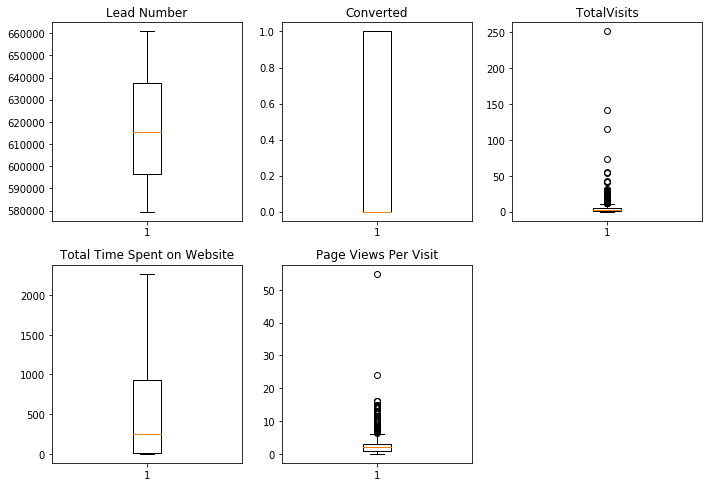

In [143]:
# list of numerical columns
num_col_list=data.select_dtypes(include=np.number).columns.tolist()

# list of categorical columns
categ_col_list=data.select_dtypes(exclude=np.number).columns.tolist()

#Boxplot for outliers
plt.figure(figsize=(10,10))
c=1

for i in num_col_list:
    plt.subplot(3,3,c)
    plt.title(i)
    plt.boxplot(data[i])
    c+=1
plt.tight_layout()

In [144]:
print(data.quantile([.75,.90,.95,.99,1],axis =0))

      Lead Number  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit
0.75    637387.25        1.0          5.0                       936.00                   3.0
0.90    650506.10        1.0          7.0                      1380.00                   5.0
0.95    655404.05        1.0         10.0                      1562.00                   6.0
0.99    659592.98        1.0         17.0                      1840.61                   9.0
1.00    660737.00        1.0        251.0                      2272.00                  55.0


Lets cap the outliers for 'TotalVisits' at 0.97 and 'Page Views Per Visit' at 0.96

In [145]:
Q1=data['TotalVisits'].quantile(.97)
data['TotalVisits']=data['TotalVisits'].clip(0,Q1)

Q1=data['Page Views Per Visit'].quantile(.96)
data['Page Views Per Visit']=data['Page Views Per Visit'].clip(0,Q1)

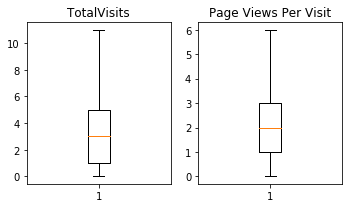

In [146]:
plt.figure(figsize=(5,3))

plt.subplot(1,2,1)
plt.title('TotalVisits')
plt.boxplot(data['TotalVisits'])

plt.subplot(1,2,2)
plt.title('Page Views Per Visit')
plt.boxplot(data['Page Views Per Visit'])

plt.tight_layout()

In [147]:
data.shape

(9240, 23)

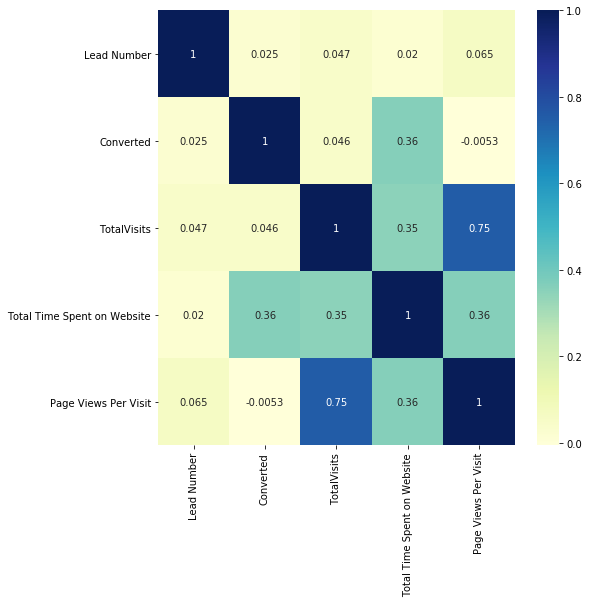

In [148]:
# Correlation matrix of the dataframe to check the level of correlation between the variables.

corr_mat=data.corr()

#Visualise the matrix using a heatmap

plt.figure(figsize=(8,8))
sns.heatmap(corr_mat,cmap="YlGnBu", annot = True)

### Converting some binary variables (Yes/No) to 0/1

In [149]:
#list of categorical columns that have yes/ no values
binary_cols=[col for col in data if np.isin(data[col].unique(), ['Yes', 'No']).all()]

#list of categorical that have multiple values and require dummy variables
dummy_needed_cols = [x for x in categ_col_list if x not in binary_cols]
binary_cols

['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

In [150]:
dummy_needed_cols

['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity']

In [151]:
# Defining the map function to map all yes to 1 and no to 0
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the data
data[binary_cols] = data[binary_cols].apply(binary_map)

### Dummy Variables

For categorical variables with multiple levels, dummy variables need to be created.

In [152]:
#Creating dummy variables for categorical columns with non binary values as obtained before in list dummy_needed_cols

dummy_data=pd.get_dummies(data[dummy_needed_cols])
dummy_data.head()

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [153]:
# Adding the dummy variables created to the original dataset

data1=pd.concat([data,dummy_data],axis=1)
data1.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0,0,0,0,0,0,Modified,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0,0,0,0,0,0,Modified,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [154]:
# Now the repetative columns for which dummy variables are already createdmay be dropped to give the final dataframe for 
# modelling

data_final=data1.drop(dummy_needed_cols,axis=1)

In [155]:
data_final.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [156]:
# No. of columns after dummy variable addtion and no. of rows retained after data preparation.
data_final.shape

(9240, 78)

In [157]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 78 columns):
Lead Number                                           9240 non-null int64
Do Not Email                                          9240 non-null int64
Do Not Call                                           9240 non-null int64
Converted                                             9240 non-null int64
TotalVisits                                           9240 non-null float64
Total Time Spent on Website                           9240 non-null int64
Page Views Per Visit                                  9240 non-null float64
Search                                                9240 non-null int64
Magazine                                              9240 non-null int64
Newspaper Article                                     9240 non-null int64
X Education Forums                                    9240 non-null int64
Newspaper                                             9240 non-null int64
D

In [158]:
#conversion rate as per the final dataset

Converted = (sum(data_final['Converted'])/len(data_final['Converted'].index))*100
Converted

38.53896103896104

In [159]:
data_final.set_index('Lead Number',inplace=True)

In [160]:
# Putting response variable to y
y = data_final['Converted']

# Putting feature variables to X
X = data_final.drop(['Converted',  'Last Notable Activity_Form Submitted on Website'], axis=1)
#Lead number is omitted since its jua=st a random number
#'Last Notable Activity_Form Submitted on Website' is omitted since its value is redundant

In [161]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
660727,0,0,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
660719,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
660681,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [162]:
y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

## Test-Train Split

In [163]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [164]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6.468000e+03,6.468000e+03,6.468000e+03
mean,-1.798877e-17,-1.609377e-16,-9.142003e-17
std,1.000077e+00,1.000077e+00,1.000077e+00
min,-1.122305e+00,-8.853708e-01,-1.266675e+00
25%,-7.729250e-01,-8.634138e-01,-7.025878e-01
50%,-7.416494e-02,-4.352528e-01,-1.385005e-01
75%,6.245952e-01,8.098906e-01,4.255868e-01
max,2.720875e+00,3.271816e+00,2.117849e+00


In [165]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
641410,0,0,-1.122305,-0.885371,-1.266675,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
597687,0,0,0.275215,0.005716,-0.516439,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
626825,0,0,0.624595,-0.691418,0.143543,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
587928,0,0,0.624595,1.365219,1.553761,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
622366,0,0,-1.122305,-0.885371,-1.266675,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Model Building using GLM

In [166]:
# adding constant since it is required in statsmodel
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())

logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6405
Model Family:                Binomial   Df Model:                           62
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 02 Mar 2020   Deviance:                          nan
Time:                        18:23:59   Pearson chi2:                 9.67e+18
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                               1.024e+28   1.83e+20    5.6e+07      0.000    1.02e+28    1.02e+28
Do Not Email                                       -7.005e+14   4.73e+06  -1.48e+08      0.000   -7.01e+14   -7.01e+14
Do Not Call                                         5.491e+14   4.89e+07   1.12e+07      0.000    5.49e+14    5.49e+14
TotalVisits                                         1.645e+14   1.38e+06   1.19e+08      0.000    1.64e+14    1.64e+14
Total Time Spent on Website                         8.346e+14    9.7e+05    8.6e+08      0.000    8.35e+14    8.35e+14
Page Views Per Visit                               -3.383e+14   1.52e+06  -2.22e+08      0.000   -3.38e+14   -3.38e+14
Search                                             -1.942e+15   2.22e+07  -8.76e+07      0.000   -1.94e+15   -1.94e+15
Magazine                                            4.344e+26   7.76e+18    5.6e+07      0.000    4.34e+26    4.34e+26
Newspaper Article                                   6.044e+15   6.73e+07   8.98e+07      0.000    6.04e+15    6.04e+15
X Education Forums                                 -4.119e+15   1.11e+08  -3.71e+07      0.000   -4.12e+15   -4.12e+15
Newspaper                                          -1.747e+16   6.73e+07   -2.6e+08      0.000   -1.75e+16   -1.75e+16
Digital Advertisement                              -2.047e+16   4.78e+07  -4.28e+08      0.000   -2.05e+16   -2.05e+16
Through Recommendations                             2.105e+14   2.86e+07   7.37e+06      0.000     2.1e+14     2.1e+14
Receive More Updates About Our Courses             -1.052e+25   1.88e+17   -5.6e+07      0.000   -1.05e+25   -1.05e+25
Update me on Supply Chain Content                   -3.16e+26   5.65e+18   -5.6e+07      0.000   -3.16e+26   -3.16e+26
Get updates on DM Content                          -2.622e+26   4.69e+18   -5.6e+07      0.000   -2.62e+26   -2.62e+26
I agree to pay the amount through cheque            4.133e+26   7.39e+18    5.6e+07      0.000    4.13e+26    4.13e+26
A free copy of Mastering The Interview             -6.914e+13   2.63e+06  -2.63e+07      0.000   -6.91e+13   -6.91e+13
Lead Origin_API                                    -5.318e+27   9.51e+19   -5.6e+07      0.000   -5.32e+27   -5.32e+27
Lead Origin_Landing Page Submission                -5.318e+27   9.51e+19   -5.6e+07      0.000   -5.32e+27   -5.32e+27
Lead Origin_Lead Add Form                          -5.318e+27   9.51e+19   -5.6e+07      0.000   -5.32e+27   -5.32e+27
Lead Origin_Lead Import                            -5.318e+27   9.51e+19   -5.6e+07      0.000   -5.32e+27   -5.32e+27
Lead Origin_Quick Add Form                         -5.318e+27   9.51e+19   -5.6e+07      0.000   -5.32e+27   -5.32e+27
Lead Source_Click2call                             -9.368e+26   1.67

## Feature selection using RFE

Since there are far too many variables , the most relevant ones are chosen using RFE.

In [167]:
#Instantiating logistic regression object
logreg = LogisticRegression()

#RFE Selection
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [168]:
#The variables and their RFE ranking.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 12),
 ('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('Search', False, 45),
 ('Magazine', False, 59),
 ('Newspaper Article', False, 34),
 ('X Education Forums', False, 30),
 ('Newspaper', False, 9),
 ('Digital Advertisement', False, 5),
 ('Through Recommendations', False, 4),
 ('Receive More Updates About Our Courses', False, 54),
 ('Update me on Supply Chain Content', False, 55),
 ('Get updates on DM Content', False, 56),
 ('I agree to pay the amount through cheque', False, 58),
 ('A free copy of Mastering The Interview', False, 52),
 ('Lead Origin_API', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('Lead Origin_Quick Add Form', False, 33),
 ('Lead Source_Click2call', False, 38),
 ('Lead Source_Direct Traffic', False, 27),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_

In [169]:
# The 15 columns with rfe.support_ as True are selected in order of their ranking.
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Source_Facebook', 'Lead Source_Welingak Website', 'Last Activity_Approached upfront', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation', 'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'], dtype='object')

In [170]:
#Adding constant
X_train_sm = sm.add_constant(X_train[col])

#Training the model with the chosen 15 columns.
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2901.8
Date:                Mon, 02 Mar 2020   Deviance:                       5803.6
Time:                        18:24:02   Pearson chi2:                 6.42e+03
No. Iterations:                    21   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.6674      0.060    -11.128      0.000      -0.785      -0.550
Do Not Email                                      -1.1744      0.183     -6.411      0.000      -1.533      -0.815
Total Time Spent on Website                        1.0079      0.035     28.726      0.000       0.939       1.077
Lead Origin_Landing Page Submission               -0.5586      0.073     -7.662      0.000      -0.702      -0.416
Lead Origin_Lead Add Form                          3.2755      0.184     17.785      0.000       2.915       3.636
Lead Source_Facebook                              -0.6656      0.502     -1.325      0.185      -1.650       0.319
Lead Source_Welingak Website                       1.5598      0.741      2.104      0.035       0.107       3.013
Last Activity_Approached upfront                  22.1511   1.56e+04      0.001      0.999   -3.05e+04    3.06e+04
Last Activity_Converted to Lead                   -1.2689      0.200     -6.338      0.000      -1.661      -0.877
Last Activity_Email Bounced                       -1.4676      0.411     -3.567      0.000      -2.274      -0.661
Last Activity_Had a Phone Conversation             0.8505      0.855      0.995      0.320      -0.824       2.525
Last Activity_Olark Chat Conversation             -1.2633      0.158     -8.013      0.000      -1.572      -0.954
Last Notable Activity_Email Bounced                1.6883      0.588      2.870      0.004       0.535       2.841
Last Notable Activity_Had a Phone Conversation     2.4899      1.382      1.801      0.072      -0.219       5.199
Last Notable Activity_SMS Sent                     1.4942      0.076     19.681      0.000       1.345       1.643
Last Notable Activity_Unreachable                  1.6522      0.496      3.332      0.001       0.680       2.624
==================================================================================================================
"""

The variable 'Last Activity_Approached upfront' has a very high p value and should be dropped.

In [171]:
col = col.drop('Last Activity_Approached upfront',1)

In [172]:
#Building the next model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2904.7
Date:                Mon, 02 Mar 2020   Deviance:                       5809.5
Time:                        18:24:03   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.6639      0.060    -11.076      0.000      -0.781      -0.546
Do Not Email                                      -1.1759      0.183     -6.420      0.000      -1.535      -0.817
Total Time Spent on Website                        1.0083      0.035     28.750      0.000       0.940       1.077
Lead Origin_Landing Page Submission               -0.5597      0.073     -7.680      0.000      -0.703      -0.417
Lead Origin_Lead Add Form                          3.2774      0.184     17.807      0.000       2.917       3.638
Lead Source_Facebook                              -0.6687      0.502     -1.332      0.183      -1.653       0.316
Lead Source_Welingak Website                       1.5555      0.741      2.098      0.036       0.102       3.009
Last Activity_Converted to Lead                   -1.2720      0.200     -6.353      0.000      -1.664      -0.880
Last Activity_Email Bounced                       -1.4700      0.412     -3.572      0.000      -2.277      -0.663
Last Activity_Had a Phone Conversation             0.8473      0.855      0.991      0.322      -0.828       2.522
Last Activity_Olark Chat Conversation             -1.2667      0.158     -8.035      0.000      -1.576      -0.958
Last Notable Activity_Email Bounced                1.6890      0.588      2.871      0.004       0.536       2.842
Last Notable Activity_Had a Phone Conversation     2.4906      1.382      1.802      0.072      -0.219       5.200
Last Notable Activity_SMS Sent                     1.4915      0.076     19.648      0.000       1.343       1.640
Last Notable Activity_Unreachable                  1.6495      0.496      3.327      0.001       0.678       2.621
==================================================================================================================
"""

The variable 'Last Activity_Had a Phone Conversation' has a very high p value and should be dropped.

In [173]:
col = col.drop('Last Activity_Had a Phone Conversation',1)

In [174]:
#Building the next model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2905.3
Date:                Mon, 02 Mar 2020   Deviance:                       5810.5
Time:                        18:24:03   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.6623      0.060    -11.055      0.000      -0.780      -0.545
Do Not Email                                      -1.1756      0.183     -6.415      0.000      -1.535      -0.816
Total Time Spent on Website                        1.0091      0.035     28.779      0.000       0.940       1.078
Lead Origin_Landing Page Submission               -0.5595      0.073     -7.679      0.000      -0.702      -0.417
Lead Origin_Lead Add Form                          3.2839      0.184     17.853      0.000       2.923       3.644
Lead Source_Facebook                              -0.6700      0.502     -1.334      0.182      -1.654       0.314
Lead Source_Welingak Website                       1.5486      0.741      2.089      0.037       0.095       3.002
Last Activity_Converted to Lead                   -1.2742      0.200     -6.363      0.000      -1.667      -0.882
Last Activity_Email Bounced                       -1.4740      0.412     -3.579      0.000      -2.281      -0.667
Last Activity_Olark Chat Conversation             -1.2683      0.158     -8.044      0.000      -1.577      -0.959
Last Notable Activity_Email Bounced                1.6905      0.589      2.872      0.004       0.537       2.844
Last Notable Activity_Had a Phone Conversation     3.3363      1.088      3.067      0.002       1.204       5.468
Last Notable Activity_SMS Sent                     1.4895      0.076     19.627      0.000       1.341       1.638
Last Notable Activity_Unreachable                  1.6479      0.496      3.323      0.001       0.676       2.620
==================================================================================================================
"""

The variable 'Lead Source_Facebook' has a high p-value and should be dropped

In [175]:
col = col.drop('Lead Source_Facebook',1)

In [176]:
#Building the next model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2906.3
Date:                Mon, 02 Mar 2020   Deviance:                       5812.5
Time:                        18:24:03   Pearson chi2:                 6.40e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.6724      0.059    -11.301      0.000      -0.789      -0.556
Do Not Email                                      -1.1738      0.183     -6.403      0.000      -1.533      -0.815
Total Time Spent on Website                        1.0099      0.035     28.802      0.000       0.941       1.079
Lead Origin_Landing Page Submission               -0.5514      0.073     -7.590      0.000      -0.694      -0.409
Lead Origin_Lead Add Form                          3.2935      0.184     17.917      0.000       2.933       3.654
Lead Source_Welingak Website                       1.5486      0.741      2.089      0.037       0.095       3.002
Last Activity_Converted to Lead                   -1.2694      0.200     -6.340      0.000      -1.662      -0.877
Last Activity_Email Bounced                       -1.4726      0.412     -3.575      0.000      -2.280      -0.665
Last Activity_Olark Chat Conversation             -1.2589      0.158     -7.990      0.000      -1.568      -0.950
Last Notable Activity_Email Bounced                1.6921      0.589      2.874      0.004       0.538       2.846
Last Notable Activity_Had a Phone Conversation     3.3406      1.088      3.071      0.002       1.209       5.472
Last Notable Activity_SMS Sent                     1.4927      0.076     19.678      0.000       1.344       1.641
Last Notable Activity_Unreachable                  1.6530      0.496      3.334      0.001       0.681       2.625
==================================================================================================================
"""

Now the p-values of all variables are within limit.(all below.05)

## Checking VIF 

Next,The correlation between the variables is to be checked through VIF.

In [177]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Email Bounced,1.94
0,Do Not Email,1.83
2,Lead Origin_Landing Page Submission,1.38
3,Lead Origin_Lead Add Form,1.30
10,Last Notable Activity_SMS Sent,1.28
4,Lead Source_Welingak Website,1.22
8,Last Notable Activity_Email Bounced,1.21
1,Total Time Spent on Website,1.12
5,Last Activity_Converted to Lead,1.05
7,Last Activity_Olark Chat Conversation,1.04


As seen above, VIF values are all below 5. Hence,the above model is the final one.

## Making Predictions

In [178]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
641410    0.172707
597687    0.228291
626825    0.202509
587928    0.838585
622366    0.172707
613574    0.895704
628456    0.123375
588051    0.913499
649586    0.209177
592598    0.943452
dtype: float64

In [179]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17270683, 0.22829072, 0.20250928, 0.83858518, 0.17270683,
       0.89570351, 0.12337505, 0.91349886, 0.20917748, 0.94345193])

In [180]:
#the dataframe with actual conversions and predicted probablity values are created for analysis

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.172707,641410
1,0,0.228291,597687
2,0,0.202509,626825
3,0,0.838585,587928
4,0,0.172707,622366


In [181]:
# Arbitarily taking .5 as the threshhold for whether the lead is converted or not, a value of  or  is added to the df
# if probablity>.5 , 1 indicating conversion else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.172707,641410,0
1,0,0.228291,597687,0
2,0,0.202509,626825,0
3,0,0.838585,587928,1
4,0,0.172707,622366,0


## Analysis of the model

In order to capture the errors and evaluate the model, lests check the confusion matrix

#### Confusion Matrix Construction

In [182]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3499  503]
 [ 888 1578]]


As seen from the table above, the correctly predicted labels are contained in the first row and first column, and the last row and last column  (3462,1629)

#### Accuracy Check

In [183]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7849412492269635


The accuracy is approximately 79% which is a good value.However this alone is not sufficient to aallyse the model so lests check some other metrics.

#### Metrics beyond simple accuracy

In [184]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [185]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6399026763990268

In [186]:
# Let us calculate specificity
TN / float(TN+FP)

0.8743128435782109

In [187]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1256871564217891


In [188]:
# positive predictive value 
print (TP / float(TP+FP))

0.7582892839980778


In [189]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7975837702302256


Here the accuracy and specificity of the model is high . However the sensitivity is low which will impact the model since the main objective is to identify leads which are most probable to churn .This might be because of the cut-off chosen at random with no particular logic behind it. So the ideal cut off point needto be found. 

#### Plotting ROC Curve

Lets analyse the trade off between sensitivity and specificity using ROC curve.

In [190]:
#Plot ROC

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

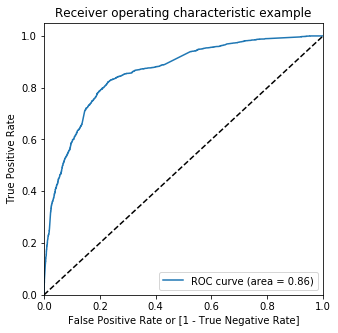

In [191]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In the Y-axis, you have the values of True positive rate(Sensitivity) and on the X-axis, you have the value of False Positive rate(1 - Specificity). 

#### Finding optimal cut-off point

In [192]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.172707,641410,0,1,1,0,0,0,0,0,0,0,0
1,0,0.228291,597687,0,1,1,1,0,0,0,0,0,0,0
2,0,0.202509,626825,0,1,1,1,0,0,0,0,0,0,0
3,0,0.838585,587928,1,1,1,1,1,1,1,1,1,1,0
4,0,0.172707,622366,0,1,1,0,0,0,0,0,0,0,0


In [193]:
#calculate the values of accuracy, sensitivity, and specificity at different cut-off values and stored them in a dataframe
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.536642  0.982563  0.261869
0.2   0.2  0.730365  0.873479  0.642179
0.3   0.3  0.784787  0.831711  0.755872
0.4   0.4  0.796537  0.774534  0.810095
0.5   0.5  0.784941  0.639903  0.874313
0.6   0.6  0.774892  0.546634  0.915542
0.7   0.7  0.758194  0.455799  0.944528
0.8   0.8  0.738095  0.364558  0.968266
0.9   0.9  0.682282  0.182076  0.990505


When the probability thresholds are very low, the sensitivity is very high and specificity is very low. 

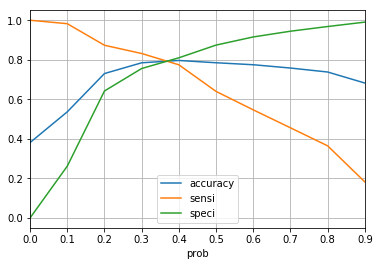

In [194]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid()
plt.show()

As you can see, at about a threshold of 0.375, the curves of accuracy, sensitivity and specificity intersect, and they all take a value of around 80%.

In [195]:
# From the curve above, 0.375 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.375 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.172707,641410,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.228291,597687,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.202509,626825,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.838585,587928,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.172707,622366,0,1,1,0,0,0,0,0,0,0,0,0


In [196]:
# Assigning lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.172707,641410,0,1,1,0,0,0,0,0,0,0,0,0,17
1,0,0.228291,597687,0,1,1,1,0,0,0,0,0,0,0,0,23
2,0,0.202509,626825,0,1,1,1,0,0,0,0,0,0,0,0,20
3,0,0.838585,587928,1,1,1,1,1,1,1,1,1,1,0,1,84
4,0,0.172707,622366,0,1,1,0,0,0,0,0,0,0,0,0,17


In [197]:
y_train_pred_final.columns

Index(['Converted', 'Converted_prob', 'Prospect ID', 'predicted', 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 'final_predicted', 'Lead_Score'], dtype='object')

In [198]:
y_train_final=y_train_pred_final[['Prospect ID','Converted','Converted_prob','final_predicted', 'Lead_Score']]

In [199]:
# Let's check the overall accuracy.
print(round((metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)),2))

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2


0.8


array([[3191,  811],
       [ 514, 1952]], dtype=int64)

In [244]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [245]:
# sensitivity of our logistic regression model
round((TP / float(TP+FN)),1)

0.8

In [202]:
#  calculating specificity
round((TN / float(TN+FP)),2)

0.8

In [203]:
# Calculating false postive rate 
print(FP/ float(TN+FP))

0.2026486756621689


In [204]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7064784654361201


In [205]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8612685560053981


#### Precision and Recall

Now lets analyse the same final model in terms of 'Precision' and 'Recall' to decide the cut off point.

Precision: Probability that a predicted 'Yes' is actually a 'Yes'.
Recall:  Probability that an actual 'Yes' case is predicted correctly.

In [206]:
#Taking the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3499,  503],
       [ 888, 1578]], dtype=int64)

In [207]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1]) 

0.7582892839980778

In [208]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6399026763990268

In [209]:
round((precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)),2)

0.76

In [210]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6399026763990268

#### Precision and Recall tradeoff

In [211]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25      1
 26      0
 27      1
 28      1
 29      0
 30      1
 31      0
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      0
 43      0
 44      0
 45      0
 46      1
 47      0
 48      0
 49      1
 50      0
 51      1
 52      1
 53      1
 54      1
 55      0
 56      1
 57      0
 58      1
 59      0
 60      0
 61      0
 62      1
 63      0
 64      1
 65      0
 66      1
 67      1
 68      0
 69      1
 70      1
 71      0
 72      1
 73      0
 74      0
 75      0
 76      1
 77      0
 78      0
 79      0
 80      0
 81      0
 82      0
 83      0
 84      0
 85      0
 86      0
 87      0
 88      1
 89      1
 90      1

In [212]:
# precision, recall at different hresholds are plotted to find the optimal threshold value
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

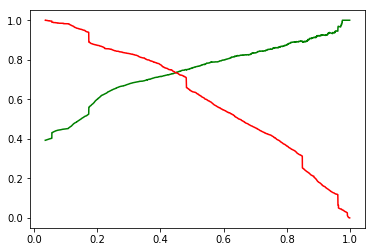

In [213]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Here there is a trade off between the precision and recall and at around.41 we get a precision and recall of around 78%

## Predictions on the test set

Lets choose sensitivity-specificity view of the model to decide the cut off as 0.38 and make predictions on the test set.

In [214]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
641410,0,0,-1.122305,-0.885371,-1.266675,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
597687,0,0,0.275215,0.005716,-0.516439,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
626825,0,0,0.624595,-0.691418,0.143543,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
587928,0,0,0.624595,1.365219,1.553761,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
622366,0,0,-1.122305,-0.885371,-1.266675,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [215]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
Lead Number,,,,,,,,,,,,
619003,0,0.933036,0,0,0,0,0,0,0,0,1,0
636884,0,-0.900812,0,1,0,0,0,0,0,0,1,0
590281,0,-0.793792,0,0,0,0,0,0,0,0,0,1
579892,0,-0.900812,0,0,0,0,0,1,0,0,0,0
617929,0,-0.900812,0,1,0,0,0,0,0,0,0,0


In [216]:
X_test_sm = sm.add_constant(X_test)
# Predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [217]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
Lead Number,
619003,0.853538
636884,0.960989
590281,0.544618
579892,0.055146
617929,0.847017


In [218]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Making ProsectID to index
y_test_df['Prospect ID'] = y_test_df.index
# Removing index for both dataframes to append 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,619003,0.853538
1,1,636884,0.960989
2,1,590281,0.544618
3,0,579892,0.055146
4,1,617929,0.847017


In [219]:
# Renaming 0 as Converted_Prob
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_prob'], axis=1)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,619003,1,0.853538
1,636884,1,0.960989
2,590281,1,0.544618
3,579892,0,0.055146
4,617929,1,0.847017


In [220]:
# Calculating final_predicted
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.375 else 0)
# Calculating Lead Score
y_pred_final['Lead_Score']= round(y_pred_final['Converted_prob'],2)*100
y_pred_final.head(5)

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,619003,1,0.853538,1,85.0
1,636884,1,0.960989,1,96.0
2,590281,1,0.544618,1,54.0
3,579892,0,0.055146,0,6.0
4,617929,1,0.847017,1,85.0


#### Analysis of the predictions on the Test data

In [221]:
# overall accuracy.
round((metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)),2)

0.81

In [222]:
confusion_final = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_final

array([[1367,  310],
       [ 223,  872]], dtype=int64)

In [223]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

In [224]:
# sensitivity of our logistic regression model
round((TP / float(TP+FN)),2)

0.8

In [225]:
#calculating specificity
round((TN / float(TN+FP)),2)

0.82

#### Adding the lead score to original dataset

In [243]:
# the predicted test and train set with lead score values are merged to get the complete set.

complet_data_converted=y_train_final.append(y_pred_final, ignore_index=True)
complet_data_converted.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,641410,0,0.172707,0,17.0
1,597687,0,0.228291,0,23.0
2,626825,0,0.202509,0,20.0
3,587928,0,0.838585,1,84.0
4,622366,0,0.172707,0,17.0


In [228]:
complet_data_converted.rename(columns={'Prospect ID':'Lead Number'},inplace=True)

complet_data_converted.head()

,Lead Number,Converted,Converted_prob,final_predicted,Lead_Score
0,641410,0,0.172707,0,17.0
1,597687,0,0.228291,0,23.0
2,626825,0,0.202509,0,20.0
3,587928,0,0.838585,1,84.0
4,622366,0,0.172707,0,17.0


In [235]:
# predicted dataset sorted as per the leadnumber. The original is also sorted.

complet_data_converted.sort_values('Lead Number',inplace=True)
df.sort_values('Lead Number',inplace=True)
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9239,579533,Landing Page Submission,Direct Traffic,0,0,1,6.0,1279,3.00,SMS Sent,0,0,0,0,0,0,0,0,0,0,0,1,Modified
9238,579538,Landing Page Submission,Google,0,0,1,3.0,499,3.00,SMS Sent,0,0,0,0,0,0,0,0,0,0,0,0,SMS Sent
9237,579545,Landing Page Submission,Direct Traffic,1,0,0,2.0,199,2.00,SMS Sent,0,0,0,0,0,0,0,0,0,0,0,1,SMS Sent
9236,579546,Landing Page Submission,Direct Traffic,0,0,0,2.0,238,2.00,SMS Sent,0,0,0,0,0,0,0,0,0,0,0,1,SMS Sent
9235,579564,Landing Page Submission,Direct Traffic,1,0,1,8.0,1845,2.67,Email Marked Spam,0,0,0,0,0,0,0,0,0,0,0,0,Email Marked Spam


In [242]:
# Lead score assigned to the original dataset

df['Lead Score']=complet_data_converted['Lead_Score']
df.set_index('Lead Number',inplace=True)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Score
Lead Number,,,,,,,,,,,,,,,,,,,,,,,
579533,Landing Page Submission,Direct Traffic,0,0,1,6.0,1279,3.00,SMS Sent,0,0,0,0,0,0,0,0,0,0,0,1,Modified,96.0
579538,Landing Page Submission,Google,0,0,1,3.0,499,3.00,SMS Sent,0,0,0,0,0,0,0,0,0,0,0,0,SMS Sent,41.0
579545,Landing Page Submission,Direct Traffic,1,0,0,2.0,199,2.00,SMS Sent,0,0,0,0,0,0,0,0,0,0,0,1,SMS Sent,17.0
579546,Landing Page Submission,Direct Traffic,0,0,0,2.0,238,2.00,SMS Sent,0,0,0,0,0,0,0,0,0,0,0,1,SMS Sent,96.0
579564,Landing Page Submission,Direct Traffic,1,0,1,8.0,1845,2.67,Email Marked Spam,0,0,0,0,0,0,0,0,0,0,0,0,Email Marked Spam,17.0


In [240]:
df.shape

(9240, 24)

### Conclusion